In [11]:
import numpy as np

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip
    
'''
    if 'wget' is not recognized as an internal or external command,
operable program or batch file.
 the copy paste  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip (click it) in browser for downlod horse-or-human.zip
''' 
    

'wget' is not recognized as an internal or external command,
operable program or batch file.


"\n    if 'wget' is not recognized as an internal or external command,\noperable program or batch file.\n the copy paste  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip (click it) in browser for downlod horse-or-human.zip\n"

In [10]:
# unzip horse-or-human.zip

import os
import zipfile
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')
zip_ref.close()
# we get new folder horse-or-huma

In [2]:
#store dir
train_human_dir =os.path.join('horse-or-human/humans')
train_horse_dir = os.path.join('horse-or-human/horses')

In [3]:
#store name of image
train_horse_names = os.listdir(train_horse_dir)
train_human_names =os.listdir(train_human_dir)

In [4]:
train_horse_names[:4]

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png']

In [5]:
train_human_names[:4]

['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png']

In [6]:
#check number of image
print(len(train_human_names)) # total number of human image
print(len(train_horse_names)) # total number of horse image

527
500


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0 



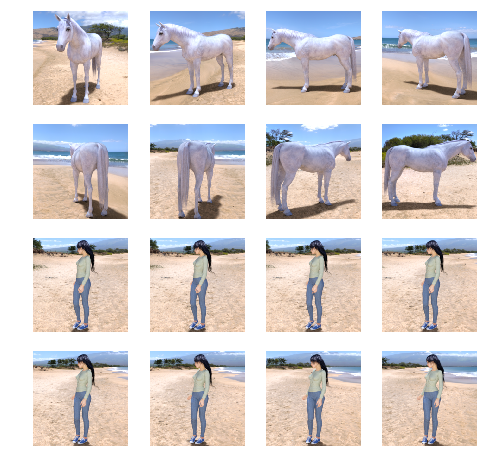

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index += 8 # evey time change value (randomness)
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Read an image from a file into an array.
then display

In [12]:
# RANDOM IMAGE SELECT
a=np.random.randint(10,17,1)
b=np.random.randint(10,30,1)
img_path ="horse-or-human/humans\\human%d-%d.png"%(a,b)
img_path

'horse-or-human/humans\\human10-28.png'

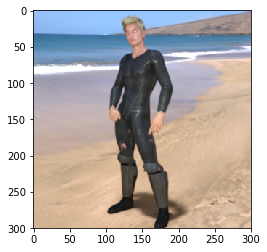

In [13]:
img = mpimg.imread(img_path)

plt.imshow(img)

In [14]:
img_path

'horse-or-human/humans\\human10-28.png'

# building model 

our  purpose is to classification in two class(binary classification) so we will use Sigmoid 

In [15]:
import tensorflow as tf

In [16]:
model = tf.keras.models.Sequential(layers =[
    #convolution 1st
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(300,300,3)),
    # polling for compresstion data without loss of features 
    # make 2x2 matrix to 1x1 (take max element of 2x2)
    tf.keras.layers.MaxPool2D(2,2),
    
    #convolution  2nd
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    # polling for compresstion data without loss of features 
    # make 2x2 matrix to 1x1 (take max element of 2x2)
    tf.keras.layers.MaxPool2D(2,2),
    
    #convolution  3rd
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    # polling for compresstion data without loss of features 
    # make 2x2 matrix to 1x1 (take max element of 2x2)
    tf.keras.layers.MaxPool2D(2,2),
    #convolution  3rd
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    # polling for compresstion data without loss of features 
    # make 2x2 matrix to 1x1 (take max element of 2x2)
    tf.keras.layers.MaxPool2D(2,2),
    
    #convolution  3rd
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    # polling for compresstion data without loss of features 
    # make 2x2 matrix to 1x1 (take max element of 2x2)
    tf.keras.layers.MaxPool2D(2,2),
    
    
    #input layer
    tf.keras.layers.Flatten(),
    #hidden layer
    tf.keras.layers.Dense(units=512,activation='relu'),
    # output layer
    tf.keras.layers.Dense(units=1,activation='sigmoid')
    
]


)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid

In [18]:
from tensorflow.keras.optimizers import RMSprop

In [19]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

# DATA PREPROCESSING

normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range
This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory)
                                                        

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled TO [0 1]
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


# if any error 
Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above
#reset all riuntime

In [27]:
    # if any error 
    history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
9/9 [==============================] - 13s 1s/step - loss: 0.6358 - acc: 0.6368
Epoch 2/15
9/9 [==============================] - 11s 1s/step - loss: 0.6224 - acc: 0.6641
Epoch 3/15
9/9 [==============================] - 12s 1s/step - loss: 0.5704 - acc: 0.7371
Epoch 4/15
9/9 [==============================] - 12s 1s/step - loss: 0.3118 - acc: 0.8861
Epoch 5/15
9/9 [==============================] - 12s 1s/step - loss: 0.2931 - acc: 0.9017
Epoch 6/15
9/9 [==============================] - 12s 1s/step - loss: 0.1435 - acc: 0.9445
Epoch 7/15
9/9 [==============================] - 12s 1s/step - loss: 0.1523 - acc: 0.9396
Epoch 8/15
9/9 [==============================] - 11s 1s/step - loss: 0.1310 - acc: 0.9649
Epoch 9/15
9/9 [==============================] - 12s 1s/step - loss: 0.0498 - acc: 0.9834
Epoch 10/15
9/9 [==============================] - 12s 1s/step - loss: 0.1798 - acc: 0.9455
Epoch 11/15
9/9 [==============================] - 12s 1s/step - loss: 0.2199 - acc: 0.95

In [ ]:
model.fit_generator

# Running the Model

In [ ]:
img_path='horse-197199_1280.jpg'

In [ ]:
import numpy as np
#from google.colab import files
from tensorflow.keras.preprocessing import image

#uploaded = files.upload()

#for fn in uploaded.keys():
 
  # predicting images
  #path = '/content/' + fn
path=img_path
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)/255
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(path + " is a human")
else:
    print(path + " is a horse")


In [ ]:
img = mpimg.imread(img_path)
plt.imshow(img)

# Visualizing Intermediate Representations

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
plt.imshow(img)

# validation

In [22]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.



https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

In [25]:
#open validation file
import os
import zipfile
local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('validation-horse-or-human')
zip_ref.close()

In [28]:
validation_train_human =os.path.join('validation-horse-or-human/human')
validation_train_horse =os.path.join('validation-horse-or-human/horse')


In [32]:
model = tf.keras.models.Sequential(layers =[
    #convolution 1st
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
    # polling for compresstion data without loss of features 
    # make 2x2 matrix to 1x1 (take max element of 2x2)
    tf.keras.layers.MaxPool2D(2,2),
    
    #convolution  2nd
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    # polling for compresstion data without loss of features 
    # make 2x2 matrix to 1x1 (take max element of 2x2)
    tf.keras.layers.MaxPool2D(2,2),
    
    #convolution  3rd
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    # polling for compresstion data without loss of features 
    # make 2x2 matrix to 1x1 (take max element of 2x2)
    tf.keras.layers.MaxPool2D(2,2),
    #convolution  3rd
   
    #tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    # polling for compresstion data without loss of features 
    # make 2x2 matrix to 1x1 (take max element of 2x2)
    #tf.keras.layers.MaxPool2D(2,2),
    
    #convolution  3rd
    #tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    # polling for compresstion data without loss of features 
    # make 2x2 matrix to 1x1 (take max element of 2x2)
    
    #tf.keras.layers.MaxPool2D(2,2),
    
    
    #input layer
    tf.keras.layers.Flatten(),
    #hidden layer
    tf.keras.layers.Dense(units=512,activation='relu'),
    # output layer
    tf.keras.layers.Dense(units=1,activation='sigmoid')
    
])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [40]:

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [41]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
9/9 [==============================] - 11s 1s/step - loss: 2.7274 - acc: 0.5180 - val_loss: 0.5902 - val_acc: 0.6758
Epoch 2/15
9/9 [==============================] - 9s 998ms/step - loss: 0.6599 - acc: 0.7108 - val_loss: 1.2437 - val_acc: 0.5469
Epoch 3/15
9/9 [==============================] - 9s 1s/step - loss: 0.6573 - acc: 0.8345 - val_loss: 0.7914 - val_acc: 0.7891
Epoch 4/15
9/9 [==============================] - 9s 1s/step - loss: 0.2001 - acc: 0.9211 - val_loss: 0.8525 - val_acc: 0.8125
Epoch 5/15
9/9 [==============================] - 10s 1s/step - loss: 0.2119 - acc: 0.9581 - val_loss: 1.8359 - val_acc: 0.6016
Epoch 6/15
9/9 [==============================] - 9s 1s/step - loss: 0.3020 - acc: 0.8802 - val_loss: 1.0372 - val_acc: 0.8281
Epoch 7/15
9/9 [==============================] - 9s 1s/step - loss: 0.0976 - acc: 0.9659 - val_loss: 1.4056 - val_acc: 0.8242
Epoch 8/15
9/9 [==============================] - 9s 1s/step - loss: 0.0693 - acc: 0.9698 - val_loss: 1.34